<a href="https://colab.research.google.com/github/NicoAN42/SKRPSI/blob/main/amitofoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow
from tensorflow.keras.layers import Conv2D, Input, concatenate, Activation, InputLayer, Dense, Reshape, Flatten
from tensorflow.keras.layers import LeakyReLU,ReLU, MaxPooling2D, BatchNormalization,GlobalMaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.activations import softmax,sigmoid
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout,SpatialDropout2D,GaussianDropout
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import os
import random
import shutil

In [3]:
from tensorflow.keras.optimizers import SGD

In [4]:
CLASS = 3
#sourcepath isi semua data train, folder valid kosongin datanya sisai folder classnya
sourcePath = '/content/drive/MyDrive/Colab Notebooks/Dataset Backup/'
train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Backup/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Backup/valid'
test_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Backup/test'

#nico

In [5]:
classLabels =['covid','normal', 'pneumonia']

In [6]:
model = Sequential()

In [7]:
model.add(layers.InputLayer(input_shape=(256, 256, 3)))

In [8]:
input_Layer=model.add(layers.InputLayer(input_shape=(256, 256, 3)))

In [9]:
#Layer 1
model.add(layers.Conv2D(32, (3,3), padding='same', name='conv_1'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.SpatialDropout2D(0.2,data_format='channels_first'))
model.add(layers.BatchNormalization(name='norm_1'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides= 2))
model.add(layers.Dropout(0.2))


In [10]:
#Layer 2
model.add(layers.Conv2D(64, (3,3), padding='same', name='conv_2')),
#model.add(layers.Dropout(0.1))
#x = Dense(units=128,activation='relu')(x),
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(layers.Dropout(0.2))


In [11]:
# Layer 3
model.add(layers.Conv2D(128, (3,3), padding='same', name='conv_3'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_3'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [12]:
# Layer 4
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (1,1), padding='same', name='conv_4'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_4'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))

In [13]:
# Layer 5
model.add(layers.Conv2D(128, (3,3), padding='same', name='conv_5'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization(name='norm_5'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(layers.Dropout(0.2))


In [14]:
# Layer 6
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3,3), padding='same', name='conv_6'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_6'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))


In [15]:
# Layer 7
model.add(layers.Conv2D(128, (1,1), padding='same', name='conv_7'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_7'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [16]:
# Layer 8
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3,3), padding='same', name='conv_8'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_8'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(layers.Dropout(0.25))


In [17]:
# Layer 9
model.add(layers.Conv2D(512, (3,3), padding='same', name='conv_9'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_9'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [18]:
# Layer 10
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3,3), padding='same', name='conv_10'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_10'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))


In [19]:

# Layer 11
model.add(layers.Conv2D(512, (3,3), padding='same', name='conv_11'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_11'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [20]:
# Layer 12
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (1,1), padding='same', name='conv_12'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_12'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))


In [21]:
# Layer 13
model.add(layers.Conv2D(512, (3,3), padding='same', name='conv_13'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_13'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(layers.Dropout(0.2))

In [22]:
###
#model.add(layers.SpatialDropout2D(0.2,data_format='channels_first'))
###


In [23]:
# Layer 14
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(1024, (3,3), padding='same', name='conv_14'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_14'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))


In [24]:
# Layer 15
model.add(layers.Conv2D(512, (1,1), padding='same', name='conv_15'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_15'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [25]:
# Layer 16
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(1024, (3,3), padding='same', name='conv_16'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_16'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))

In [26]:
# Layer 17
model.add(layers.Conv2D(512, (1,1), padding='same', name='conv_17'))
model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization(name='norm_17'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))


In [27]:
# Layer 18
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(1024, (3,3), padding='same', name='conv_18'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization(name='norm_18'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = 2))
#model.add(layers.Dropout(0.5))


In [28]:
# Layer 19
model.add(layers.Conv2D(1024, (3,3), padding='same', name='conv_19'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization(name='norm_19'))
model.add(layers.MaxPooling2D(pool_size=(1, 1), strides = 2))
#model.add(layers.Dropout(0.5))

In [29]:
#model.add(layers.Conv2D(5 * (4 + 1 + CLASS), (1,1), strides=(2,2), padding='same', name='conv_semi'))
#model.add(LeakyReLU(alpha=0.1))
#model.add(layers.SpatialDropout2D(0.2,data_format='channels_first'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Conv2D(5 * (4 + 1 + CLASS), (1,1), strides=(2,2), padding='same', name='conv_final'))
#model.add(layers.Conv2D(3, (3,3), padding='same', name='conv_final'))
#model.add(LeakyReLU(alpha=0.1))
#model.add(layers.Dropout(0.1))


In [30]:
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024,model.add(LeakyReLU(alpha=0.1))))
model.add(layers.Dense(3,Activation('softmax')))
model.output_shape

(None, 3)

In [31]:
output = model.output_shape

In [32]:
print(input_Layer)

None


In [33]:
initial_learning_rate=0.001

In [34]:
lr_schedule = ExponentialDecay(
   initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)


In [35]:
opt = Adam(learning_rate=initial_learning_rate)

In [36]:
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

In [37]:
print(model.summary())
print(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        multiple                  0         
                                                                 
 conv_1 (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 32)      0         
                                                                 
 norm_1 (BatchNormalization)  (None, 256, 256, 32)     128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                        

In [38]:
X = []
Y = []
def transferBetweenFolders(source, dest, splitRate): 
    global sourceFiles
    sourceFiles=os.listdir(source)
    if(len(sourceFiles)!=0):
        transferFileNumbers=int(len(sourceFiles)*splitRate)
        transferIndex=random.sample(range(0, len(sourceFiles)), transferFileNumbers)
        for eachIndex in transferIndex:
            shutil.move(source+str(sourceFiles[eachIndex]), dest+str(sourceFiles[eachIndex]))
    else:
        print("No file moved. Source empty!")
        

In [39]:
def transferAllClassBetweenFolders(source, dest, splitRate):
    for label in classLabels:
        transferBetweenFolders(sourcePath+'/'+source+'/'+label+'/', 
                               sourcePath+'/'+dest+'/'+label+'/', 
                               splitRate)
        

In [40]:
def prepareNameWithLabels(folderName):
    sourceFiles=os.listdir(sourcePath+'/train/'+folderName)
    for val in sourceFiles:
        X.append(val)
        for i in range(len(classLabels)):
          if(folderName==classLabels[i]):
              Y.append(i)
# Organize file names and class labels in X and Y variables
for i in range(len(classLabels)):
  prepareNameWithLabels(classLabels[i])

def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

In [41]:
X=np.asarray(X)
Y=np.asarray(Y)

print(X)
print(Y)

skf = StratifiedKFold(n_splits=5
                      , shuffle=True)
skf.get_n_splits(X, Y)
foldNum=0

['COVID(506).png' 'COVID(527).png' 'COVID(606).png' ...
 'person1429_bacteria_3691.jpeg' 'person1426_bacteria_3667.jpeg'
 'person1390_bacteria_3534.jpeg']
[0 0 0 ... 2 2 2]


Results for fold 1
Found 1917 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Epoch 1/100
60/60 - 559s - loss: 0.7133 - accuracy: 0.8143 - val_loss: 830.0356 - val_accuracy: 0.3313 - 559s/epoch - 9s/step
Epoch 2/100
60/60 - 32s - loss: 0.2716 - accuracy: 0.9113 - val_loss: 23.9610 - val_accuracy: 0.5594 - 32s/epoch - 533ms/step
Epoch 3/100
60/60 - 24s - loss: 0.2265 - accuracy: 0.9275 - val_loss: 1.7946 - val_accuracy: 0.6750 - 24s/epoch - 397ms/step
Epoch 4/100
60/60 - 24s - loss: 0.1769 - accuracy: 0.9421 - val_loss: 0.7252 - val_accuracy: 0.8906 - 24s/epoch - 400ms/step
Epoch 5/100
60/60 - 24s - loss: 0.1494 - accuracy: 0.9531 - val_loss: 0.2130 - val_accuracy: 0.9438 - 24s/epoch - 394ms/step
Epoch 6/100
60/60 - 23s - loss: 0.1800 - accuracy: 0.9390 - val_loss: 0.2671 - val_accuracy: 0.9500 - 23s/epoch - 390ms/step
Epoch 7/100
60/60 - 24s - loss: 0.1173 - accuracy: 0.9645 - val_loss: 1.6119 - val_accuracy: 0.6719 - 24s

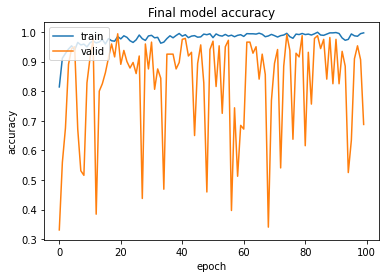

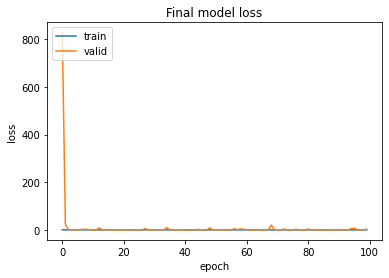

12/12 [==============================] - 5s 354ms/step
***Performance on Validation data***
Accuracy  : 0.31216931216931215
Precision : 0.3305966064586754
f1Score : 0.27478168572393497
[[66  5 55]
 [63  8 55]
 [74  8 44]]
Results for fold 2
Found 1917 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Epoch 1/100
60/60 - 24s - loss: 0.0466 - accuracy: 0.9885 - val_loss: 0.4247 - val_accuracy: 0.8938 - 24s/epoch - 401ms/step
Epoch 2/100
60/60 - 24s - loss: 0.0326 - accuracy: 0.9896 - val_loss: 4.8117 - val_accuracy: 0.5500 - 24s/epoch - 396ms/step
Epoch 3/100
60/60 - 24s - loss: 0.0455 - accuracy: 0.9880 - val_loss: 1.8119 - val_accuracy: 0.8031 - 24s/epoch - 393ms/step
Epoch 4/100
60/60 - 24s - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0120 - val_accuracy: 0.9937 - 24s/epoch - 394ms/step
Epoch 5/100
60/60 - 24s - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.1030 - val_accuracy: 0.9844 - 24s/epoch - 393ms/step
Epoch 6/10

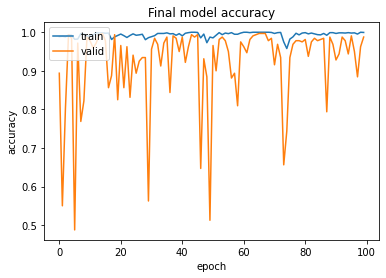

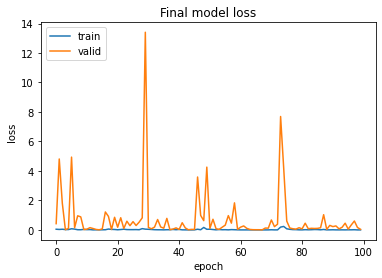

12/12 [==============================] - 4s 334ms/step
***Performance on Validation data***
Accuracy  : 0.3306878306878307
Precision : 0.3313068651778329
f1Score : 0.33095833333333335
[[47 37 42]
 [36 40 50]
 [41 47 38]]
Results for fold 3
Found 1917 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Epoch 1/100
60/60 - 24s - loss: 0.0228 - accuracy: 0.9937 - val_loss: 0.0161 - val_accuracy: 0.9906 - 24s/epoch - 406ms/step
Epoch 2/100
60/60 - 24s - loss: 0.0934 - accuracy: 0.9765 - val_loss: 1.5381 - val_accuracy: 0.7969 - 24s/epoch - 394ms/step
Epoch 3/100
60/60 - 24s - loss: 0.0654 - accuracy: 0.9854 - val_loss: 0.4295 - val_accuracy: 0.9625 - 24s/epoch - 398ms/step
Epoch 4/100
60/60 - 24s - loss: 0.0636 - accuracy: 0.9864 - val_loss: 0.3568 - val_accuracy: 0.9219 - 24s/epoch - 395ms/step
Epoch 5/100
60/60 - 24s - loss: 0.0286 - accuracy: 0.9927 - val_loss: 0.1181 - val_accuracy: 0.9844 - 24s/epoch - 395ms/step
Epoch 6/100

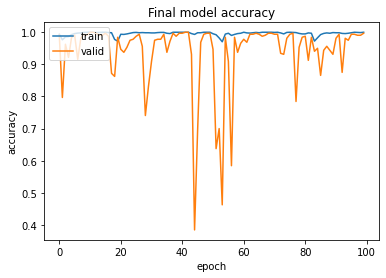

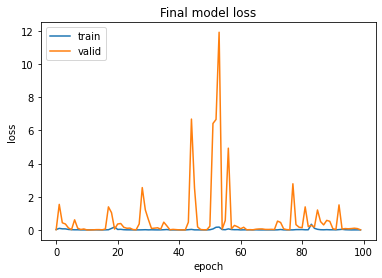

12/12 [==============================] - 4s 320ms/step
***Performance on Validation data***
Accuracy  : 0.34656084656084657
Precision : 0.3464541730670763
f1Score : 0.3464921884764405
[[39 42 45]
 [47 44 35]
 [40 38 48]]
Results for fold 4
Found 1917 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Epoch 1/100
60/60 - 24s - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0894 - val_accuracy: 0.9750 - 24s/epoch - 399ms/step
Epoch 2/100
60/60 - 24s - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0517 - val_accuracy: 0.9844 - 24s/epoch - 398ms/step
Epoch 3/100
60/60 - 24s - loss: 0.0241 - accuracy: 0.9922 - val_loss: 7.0406 - val_accuracy: 0.6344 - 24s/epoch - 396ms/step
Epoch 4/100
60/60 - 24s - loss: 0.0141 - accuracy: 0.9974 - val_loss: 1.3148 - val_accuracy: 0.8906 - 24s/epoch - 401ms/step
Epoch 5/100
60/60 - 24s - loss: 0.0209 - accuracy: 0.9958 - val_loss: 0.2968 - val_accuracy: 0.9187 - 24s/epoch - 399ms/step
Epoch 6/100

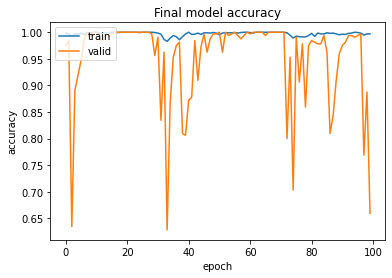

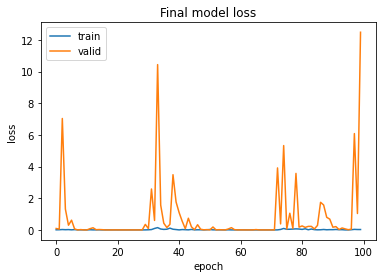

12/12 [==============================] - 4s 321ms/step
***Performance on Validation data***
Accuracy  : 0.3439153439153439
Precision : 0.23167848699763596
f1Score : 0.2725817105349615
[[80  0 46]
 [81  0 45]
 [74  2 50]]
Results for fold 5
Found 1917 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Epoch 1/100
60/60 - 24s - loss: 0.0213 - accuracy: 0.9963 - val_loss: 1.2064 - val_accuracy: 0.9156 - 24s/epoch - 405ms/step
Epoch 2/100
60/60 - 24s - loss: 0.0427 - accuracy: 0.9937 - val_loss: 0.0835 - val_accuracy: 0.9812 - 24s/epoch - 396ms/step
Epoch 3/100
60/60 - 24s - loss: 0.0233 - accuracy: 0.9979 - val_loss: 0.0786 - val_accuracy: 0.9875 - 24s/epoch - 401ms/step
Epoch 4/100
60/60 - 24s - loss: 0.0576 - accuracy: 0.9943 - val_loss: 0.0643 - val_accuracy: 0.9812 - 24s/epoch - 400ms/step
Epoch 5/100
60/60 - 24s - loss: 0.0372 - accuracy: 0.9948 - val_loss: 2.3222 - val_accuracy: 0.7875 - 24s/epoch - 395ms/step
Epoch 6/100

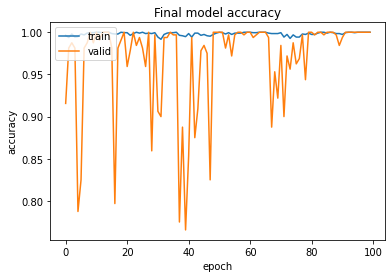

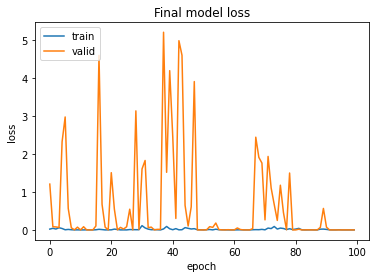

12/12 [==============================] - 4s 311ms/step
***Performance on Validation data***
Accuracy  : 0.30952380952380953
Precision : 0.30952380952380953
f1Score : 0.30952380952380953
[[35 48 43]
 [43 41 42]
 [48 37 41]]


In [42]:
for train_index, val_index in skf.split(X, Y):
    #First cut all images from validation to train (if any exists)
    transferAllClassBetweenFolders('valid', 'train', 1.0)
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    # Move validation images of this fold from train folder to the validation folder
    for eachIndex in range(len(X_val)):
        classLabel=''
        for i in range(len(classLabels)):
          if(Y_val[eachIndex]==i):
              classLabel=classLabels[i]
        #Then, copy the validation images to the validation folder
        shutil.move(sourcePath+'/train/'+classLabel+'/'+X_val[eachIndex], 
                    sourcePath+'/valid/'+classLabel+'/'+X_val[eachIndex])
        
    train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32)
    valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32)
    test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32)

    history = model.fit(train_batches, 
                    #steps_per_epoch=sp_epoch, 
                    validation_data=valid_batches, 
                    validation_steps=10, 
                    epochs=100, 
                    verbose=2)
              model.evaluate(test_batches)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Final model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Final model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    predictions = model.predict(valid_batches, verbose=1)
    yPredictions = np.argmax(predictions, axis=1)
    true_classes = valid_batches.classes
    # evaluate validation performance
    print("***Performance on Validation data***")    
    valAcc, valPrec, valFScore = my_metrics(true_classes, yPredictions)